# Tutorial 5 : Splines and DeBoor Cox algorithm

In this lab session, we are going to plot a 2D B-spline curve using the deBoor-Cox algorithm.

## Spline curve
We recall that the B-spline $S(t)$ of degree $k$ associated to the nodes $t_0 = \cdots = t_{k} < t_{k+1} < \cdots < t_N < t_{N+1} = \cdots = t_{N+k+1}$  and to the control polygon $[D] = [D_0...D_N]$, then the B-spline writes 
$$
S(t) = \sum_{i=0}^{N} D_i \, N_i^k(t), \quad t \in [t_{k},t_{N+1}] \quad \hbox{(parameter space)}.
$$

## DeBoor-Cox algorithm
The DeBoor-Cox algorithm is a triangular scheme that allows to calculate  $S(t)$  for $t \in [t_k, t_{N+1}]$. The algorithm works as follows.

1. Determine $r$ such that $t_r \leq  t < t_{r+1}$
2. Initialisation: $D^0_{i}=D_i$ for $i\in\{r-k,\cdots,r\}$
3. For $j = 1$ to $k$:

   For $i=r-k+j$ to $r$:

$$\displaystyle{D^j_i := {(t-t_i) * D_{i}^{j-1} + (t_{i+k-j+1}-t) * D_{i-1}^{j-1} \over t_{i+k-j+1}-t_i}}$$

Return: $S(t) := D^{k}_r$

# Question 1: implementation
1. write a function that that associates to $k$ a set of nodes $(t_i)$.
2. Write a function that evaluates to $k$, $[D]$ and a parameter $t$, the evaluation $S(t)$ (using the DeBoor-Cox algorithm).

# Question 2: plot several splines curves for diffent values of $k$. What do you observe ?

In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
def give_nodes(k):
    return np.array([0]*k + list(np.arange(k+2)) + [k+1]*k)

In [48]:
def find_r(t,T):
    if t >= T[-1]:
        return int((2*len(T)-4)/3 + 1)
    for i in range(len(T)-1):
        if T[i] <= t < T[i+1]:
            return i

In [97]:
def DeBoor(k, D, t):
    T = give_nodes(k)
    r = find_r(t, T)
    Q = np.zeros((k+1, r+1, 2))
    Q[0,r-k:r+1] = D[r-k:r+1]
    for j in range(1, k+1):
        for i in range(r-k+j, r+1):
            if T[i+k-j+1]-T[i] == 0:
                div = 1
            else:
                div = T[i+k-j+1]-T[i]
            Q[j,i] = ((t-T[i])*Q[j-1,i]+(T[i+k-j+1]-t)*Q[j-1,i-1])/div
    return Q[k, r]
    


In [95]:
def DeBoor(k, D, t, T):
#    T = give_nodes(k)
    r = find_r(t, T)
    Q = np.zeros((k+1, r+1))
    print(k,r)
    Q[0,r-k:r+1] = D[r-k:r+1]
    for j in range(1, k+1):
        for i in range(r-k+j, r+1):
            if T[i+k-j+1]-T[i] == 0:
                div = 1
            else:
                div = T[i+k-j+1]-T[i]
            Q[j,i] = ((t-T[i])*Q[j-1,i]+(T[i+k-j+1]-t)*Q[j-1,i-1])/div
    return Q[k, r]
    


In [101]:
def plotDeBoor(D):
    plt.figure()
#    plt.scatter(np.linspace(0,4,len(D)),D)
    plt.scatter(*D.T)

    for k in np.arange(1,4):
        T = np.linspace(0,3.99,100)
        approx = np.array([DeBoor(k, D, t) for t in T])

        plt.plot(approx, label='k: '+str(k))
    plt.legend();
    plt.show()

In [85]:
D = np.array([1,2,0,0,2,1,2])

In [102]:
D = np.array([[0,0],[0.5,1],[1,1],[1.5,1],[2,2],[2.5,0],[3,0]])

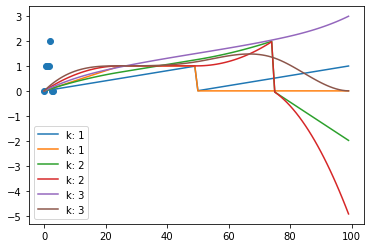

In [103]:
plotDeBoor(D)